# **Question 4- Part C**

In [10]:
import numpy as np
from scipy.signal import convolve
import matplotlib.pyplot as plt

# 1.

In [11]:
f = np.array([1, -1, 2, 3])
g = np.array([1, -2, -1])

f_padded = np.pad(f, (0, 8 - len(f)))
g_padded = np.pad(g, (0, 8 - len(g)))

conv_result = np.convolve(f_padded, g_padded)
print("1D Convolution (direct):", conv_result)

1D Convolution (direct): [ 1 -3  3  0 -8 -3  0  0  0  0  0  0  0  0  0]


# 2.

In [12]:
G = np.fft.fft(g_padded)

print("\nDFT of g (G):")
for i, val in enumerate(G):
    print(f"G[{i}] = {val:.2f}")


DFT of g (G):
G[0] = -2.00+0.00j
G[1] = -0.41+2.41j
G[2] = 2.00+2.00j
G[3] = 2.41+0.41j
G[4] = 2.00+0.00j
G[5] = 2.41-0.41j
G[6] = 2.00-2.00j
G[7] = -0.41-2.41j


In [13]:
F = np.fft.fft(f_padded)

print("\nDFT of f (F):")
for i, val in enumerate(F):
    print(f"F[{i}] = {val:.2f}")


DFT of f (F):
F[0] = 5.00+0.00j
F[1] = -1.83-3.41j
F[2] = -1.00+4.00j
F[3] = 3.83+0.59j
F[4] = 1.00+0.00j
F[5] = 3.83-0.59j
F[6] = -1.00-4.00j
F[7] = -1.83+3.41j


In [14]:
H = F * G

print("\nPointwise Multiplication (F * G):")
for i, val in enumerate(H):
    print(f"H[{i}] = {val:.2f}")


Pointwise Multiplication (F * G):
H[0] = -10.00+0.00j
H[1] = 9.00-3.00j
H[2] = -10.00+6.00j
H[3] = 9.00+3.00j
H[4] = 2.00+0.00j
H[5] = 9.00-3.00j
H[6] = -10.00-6.00j
H[7] = 9.00+3.00j


In [15]:
conv_dft = np.fft.ifft(H)

print("\nInverse DFT (Convolution result):")
for i, val in enumerate(conv_dft):
    print(f"conv[{i}] = {val.real:.2f}")


Inverse DFT (Convolution result):
conv[0] = 1.00
conv[1] = -3.00
conv[2] = 3.00
conv[3] = -0.00
conv[4] = -8.00
conv[5] = -3.00
conv[6] = 0.00
conv[7] = 0.00


# 3.

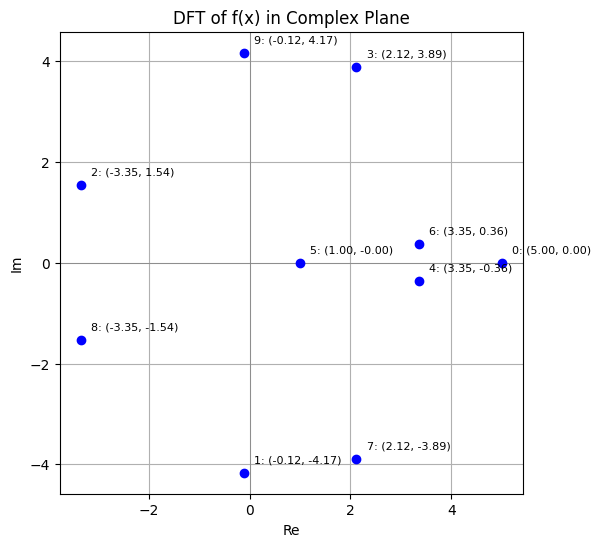

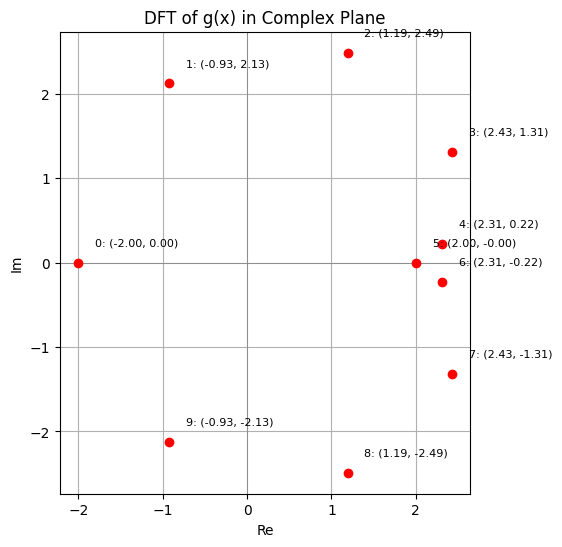

In [19]:
F_full = np.fft.fft(f_padded, 10)
G_full = np.fft.fft(g_padded, 10)

omega = np.arange(10)

def plot_complex_points(values, title, color):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.xlabel('Re')
    plt.ylabel('Im')
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.grid(True)
    plt.gca().set_aspect('equal', 'box')

    for i, val in enumerate(values):
        plt.plot(val.real, val.imag, 'o', color=color)
        label = f"{i}: ({val.real:.2f}, {val.imag:.2f})"
        plt.text(val.real + 0.2, val.imag + 0.2, label, fontsize=8)
    plt.show()

plot_complex_points(F_full, "DFT of f(x) in Complex Plane", 'blue')
plot_complex_points(G_full, "DFT of g(x) in Complex Plane", 'red')


# 4.

In [18]:
sum_f = np.sum(np.abs(f)**2)
sum_g = np.sum(np.abs(g)**2)

print("Sum |f(x)|^2 =", sum_f)
print("Sum |g(x)|^2 =", sum_g)

Sum |f(x)|^2 = 15
Sum |g(x)|^2 = 6
